### Imports and Path Setup

In [16]:
import os
import librosa
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
import soundfile as sf
import json
import pickle

# Set up paths
AUDIO_FOLDER_PATH = "D:/LV-NTF+LoopGAN/data/FSL10K/audio"
TRIMMED_AUDIO_FOLDER_PATH = "D:/LV-NTF+LoopGAN/data/FSL10K-trimmed"
AUDIO_MEL_SPECTROGRAMS_PATH = "D:/LV-NTF+LoopGAN/data/FSL10K-mel_spec"
METADATA_PATH = "D:/LV-NTF+LoopGAN/data/FSL10K/metadata.json"
PARENT_GENRES_PATH = "D:/LV-NTF+LoopGAN/data/FSL10K/parent_genres.json  "

# Create necessary directories
os.makedirs(TRIMMED_AUDIO_FOLDER_PATH, exist_ok=True)
os.makedirs(AUDIO_MEL_SPECTROGRAMS_PATH, exist_ok=True)


### Load Metadata

In [17]:
# Load metadata from JSON
with open(METADATA_PATH, 'r') as f:
    metadata = json.load(f)


# Display the relevant information (e.g., tags, bpm, and preview URL)
for audio_id, details in list(metadata.items())[:10]:  # Display first 10 entries
    name = details.get('name')
    tags = details.get('tags', [])
    bpm = details.get('annotations', {}).get('bpm', 'N/A')
    preview_url = details.get('preview_url')
    print(f"Audio ID: {audio_id} | Name: {name} | Tags: {tags} | BPM: {bpm} | Preview URL: {preview_url}")



Audio ID: 425998 | Name: Synth Loop 26_2 - (90 BPM) | Tags: ['Atmosphere', 'commercial', 'Cinematic', 'Looping', 'Drone', 'Pad', 'Drums', 'Ambient', 'Sound-Design', 'Piano', 'Loop'] | BPM: 90 | Preview URL: http://freesound.org/data/previews/425/425998_9497060-hq.mp3
Audio ID: 327722 | Name: The Torrent | Tags: ['Arp', 'Rvb', 'Stereo', 'Surgeon', 'FX', 'Water', 'BPM', 'Drowning', 'Bounce', 'Delay', 'Loop', 'Synth', 'Reverb', 'The', 'Peer-to-Peer', 'Torrent', 'minor', '105'] | BPM: 105 | Preview URL: http://freesound.org/data/previews/327/327722_2297168-hq.mp3
Audio ID: 426027 | Name: breakbeat_fill_3_3bars_128bpm.wav | Tags: ['fill', 'loop', 'groove', 'breakbeat', 'drums', 'break', 'funky', 'percussion', '128bpm', 'improvised', 'trashy', 'beat', 'drumset', 'rhythm', 'drum', 'drumming', 'drum-loop', 'groovy'] | BPM: 128 | Preview URL: http://freesound.org/data/previews/426/426027_2155630-hq.mp3
Audio ID: 426028 | Name: breakbeat_fill_2_3bars_128bpm.wav | Tags: ['fill', 'loop', 'groove',

### Trim Audio Files

In [18]:
import os
import librosa
import soundfile as sf
import numpy as np

# Function to trim audio files and ensure correct file extension
def trim_audio_files(input_dir, output_dir, duration=2.0):
    os.makedirs(output_dir, exist_ok=True)

    for subdir, dirs, files in os.walk(input_dir):
        for file in files:
            # Check if the file ends with .wav, .aiff, or .aif (and handle cases like .wav.wav)
            if file.endswith(('.wav', '.aiff', '.aif')):
                audio_path = os.path.join(subdir, file)
                
                try:
                    # Load the audio file
                    y, sr = librosa.load(audio_path, sr=None)

                    # Calculate the number of samples for the target duration
                    max_samples = int(sr * duration)

                    # Trim the waveform or pad it to the desired duration
                    if len(y) < max_samples:
                        y = np.pad(y, (0, max_samples - len(y)), 'constant')
                    else:
                        y = y[:max_samples]

                    # Handle double extensions (.wav.wav or .aiff.wav)
                    base_name = file.rsplit('.', 2)[0]  # Remove up to two extensions
                    output_file_name = base_name + '.wav'

                    # Create the output file path
                    output_file_path = os.path.join(output_dir, output_file_name)

                    # Save the trimmed audio as a .wav file
                    sf.write(output_file_path, y, sr)
                    print(f"Trimmed and saved: {output_file_path}")

                except Exception as e:
                    print(f"Error processing {audio_path}: {e}")

# Example: Process and trim all audio files from input to output directory
AUDIO_FOLDER_PATH = "D:/LV-NTF+LoopGAN/data/FSL10K/audio"
TRIMMED_AUDIO_FOLDER_PATH = "D:/LV-NTF+LoopGAN/data/FSL10K-trimmed"

trim_audio_files(AUDIO_FOLDER_PATH, TRIMMED_AUDIO_FOLDER_PATH)


Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\100269_1676089.wav
Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\100270_1676089.wav
Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\100793_949812.wav
Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\100900_949812.wav
Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\100901_949812.wav
Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\100902_949812.wav
Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\101121_1657645.wav
Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\101122_1657645.wav
Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\101264_1569192.wav
Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\101893_401166.wav
Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\101894_401166.wav
Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\101895_401166.wav
Trimmed and saved: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\101896_401166.wav
Trimmed and saved: D

### analyze one audio file

File: D:/LV-NTF+LoopGAN/data/FSL10K-trimmed/100269_1676089.wav
Original Sample Rate: 44100
Audio Shape: (88200,)
Max amplitude (Peak): 0.79388427734375
Data Type: float64
Resampling from 44100 to 22050
Tensor shape: torch.Size([1, 1, 44100])
Tensor dtype: torch.float64


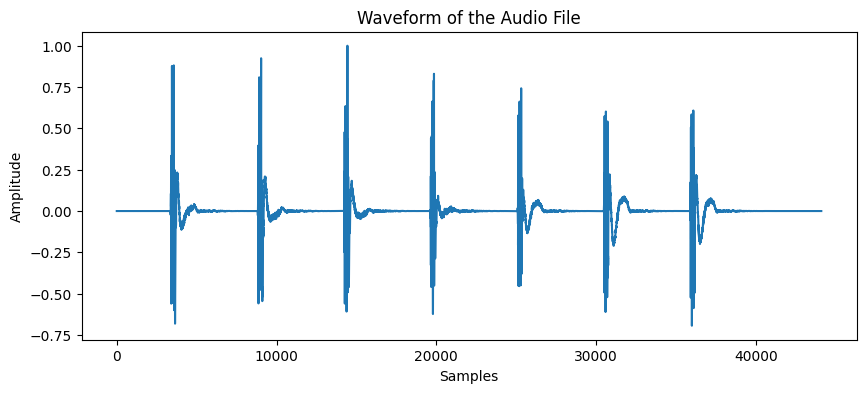

STFT output shape: torch.Size([1, 513, 176])
Error while processing D:/LV-NTF+LoopGAN/data/FSL10K-trimmed/100269_1676089.wav: expected scalar type Double but found Float


In [33]:
import os
import torch
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

# Path to the specific file you want to analyze
audio_file_path = "D:/LV-NTF+LoopGAN/data/FSL10K-trimmed/100269_1676089.wav"

# Define the Audio2Mel class (same as used in your processing pipeline)
class Audio2Mel(torch.nn.Module):
    def __init__(
        self, n_fft=1024, hop_length=256, win_length=1024, 
        sampling_rate=22050, n_mel_channels=64, mel_fmin=0.0, mel_fmax=None
    ):
        super().__init__()
        window = torch.hann_window(win_length).float()
        mel_basis = librosa.filters.mel(
            sr=sampling_rate, n_fft=n_fft, n_mels=n_mel_channels, 
            fmin=mel_fmin, fmax=mel_fmax
        )
        mel_basis = torch.from_numpy(mel_basis).float()
        self.register_buffer("mel_basis", mel_basis)
        self.register_buffer("window", window)
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.win_length = win_length

    def forward(self, audio):
        p = (self.n_fft - self.hop_length) // 2
        audio = torch.nn.functional.pad(audio, (p, p), "reflect").squeeze(1)
        
        # Perform STFT
        fft = torch.stft(
            audio, n_fft=self.n_fft, hop_length=self.hop_length,
            win_length=self.win_length, window=self.window, 
            return_complex=True
        )
        print(f"STFT output shape: {fft.shape}")  # Add this

        magnitude = torch.abs(fft)
        mel_output = torch.matmul(self.mel_basis, magnitude)
        print(f"Mel-Spectrogram shape: {mel_output.shape}")  # Add this
        
        log_mel_spec = torch.log10(torch.clamp(mel_output, min=1e-5))
        return log_mel_spec[:, :, :]


# Analyze the audio file
def analyze_audio_file(file_path, extract_func, sr=22050):
    try:
        # Load the audio file with soundfile
        y, file_sr = sf.read(file_path)
        print(f"File: {file_path}")
        print(f"Original Sample Rate: {file_sr}")
        print(f"Audio Shape: {y.shape}")
        print(f"Max amplitude (Peak): {np.max(np.abs(y))}")
        print(f"Data Type: {y.dtype}")
        
        # Resample if needed
        if file_sr != sr:
            print(f"Resampling from {file_sr} to {sr}")
            y = librosa.resample(y, orig_sr=file_sr, target_sr=sr)

        # Normalize by the peak
        peak = np.abs(y).max()
        if peak > 0:
            y /= peak

        # Convert to Tensor and cast to float64 (double) for PyTorch stft compatibility
        y_tensor = torch.from_numpy(y).unsqueeze(0).unsqueeze(0).double()  # Shape (1, 1, samples)
        print(f"Tensor shape: {y_tensor.shape}")
        print(f"Tensor dtype: {y_tensor.dtype}")

        # Plot the waveform
        plt.figure(figsize=(10, 4))
        plt.plot(y)
        plt.title("Waveform of the Audio File")
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.show()

        # Extract Mel-spectrogram
        mel = extract_func(y_tensor)
        mel = mel.squeeze(0).numpy()
        print(f"Mel-spectrogram shape: {mel.shape}")

        # Plot the Mel-spectrogram
        plt.figure(figsize=(10, 4))
        plt.imshow(mel, aspect="auto", origin="lower")
        plt.colorbar()
        plt.title("Mel-spectrogram")
        plt.xlabel("Time")
        plt.ylabel("Mel Bands")
        plt.show()

    except Exception as e:
        print(f"Error while processing {file_path}: {e}")

# Create the Mel extractor
extract_func = Audio2Mel(
    n_fft=1024, hop_length=256, win_length=1024, 
    sampling_rate=22050, n_mel_channels=64
)

# Analyze the file
analyze_audio_file(audio_file_path, extract_func)


### Mel-Spectrogram Extraction

In [59]:
import os
import torch
import numpy as np
import librosa
import soundfile as sf

# Set up paths
TRIMMED_AUDIO_FOLDER_PATH = "D:/LV-NTF+LoopGAN/data/FSL10K-trimmed"
AUDIO_MEL_SPECTROGRAMS_PATH = "D:/LV-NTF+LoopGAN/data/FSL10K-mel_spec"
os.makedirs(AUDIO_MEL_SPECTROGRAMS_PATH, exist_ok=True)

# Define the Audio2Mel class for Mel-spectrogram extraction
class Audio2Mel(torch.nn.Module):
    def __init__(self, n_fft=1024, hop_length=256, win_length=1024, 
                 sampling_rate=22050, n_mel_channels=64, mel_fmin=0.0, mel_fmax=None):
        super().__init__()
        window = torch.hann_window(win_length).float()
        mel_basis = librosa.filters.mel(sr=sampling_rate, n_fft=n_fft, 
                                        n_mels=n_mel_channels, fmin=mel_fmin, fmax=mel_fmax)
        mel_basis = torch.from_numpy(mel_basis).double()  
        self.register_buffer("mel_basis", mel_basis)
        self.register_buffer("window", window)
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.win_length = win_length

    def forward(self, audio):
        p = (self.n_fft - self.hop_length) // 2
        audio = torch.nn.functional.pad(audio, (p, p), "reflect").squeeze(1)
        fft = torch.stft(audio, n_fft=self.n_fft, hop_length=self.hop_length,
                         win_length=self.win_length, window=self.window, return_complex=True)
        magnitude = torch.abs(fft)
        mel_output = torch.matmul(self.mel_basis, magnitude)
        log_mel_spec = torch.log10(torch.clamp(mel_output, min=1e-5))
        return log_mel_spec[:, :, :]

# Function to convert a single audio file to Mel-spectrogram
def convert_file(path, extract_func, sr=22050, peak_norm=True):
    try:
        y, file_sr = sf.read(path)
        if file_sr != sr:
            print(f"Resampling {path} from {file_sr} to {sr}")
            y = librosa.resample(y, orig_sr=file_sr, target_sr=sr)

        peak = np.abs(y).max()
        if peak > 0:
            y /= peak

        y_tensor = torch.from_numpy(y).unsqueeze(0).unsqueeze(0).double()

        mel = extract_func(y_tensor)
        mel = mel.squeeze(0).numpy()

        # Pad or trim Mel spectrogram to ensure consistent shape (64, 200)
        if mel.shape[1] < 200:
            mel = np.pad(mel, ((0, 0), (0, 200 - mel.shape[1])), mode='constant', constant_values=-5)
        elif mel.shape[1] > 200:
            mel = mel[:, :200]

        return mel.astype(np.float32)

    except Exception as e:
        print(f"Error while processing {path}: {e}")
        return None

# Function to process all audio files in a directory
def process_audios(input_dir, output_dir, extract_func, extension=".wav"):
    os.makedirs(output_dir, exist_ok=True)
    audio_fns = [fn for fn in os.listdir(input_dir) if fn.endswith(extension)]
    
    for fn in audio_fns:
        input_fp = os.path.join(input_dir, fn)
        output_fp = os.path.join(output_dir, fn.replace(".wav", ".npy"))
        
        if os.path.exists(output_fp):
            print(f"Already processed: {fn}")
            continue
        
        try:
            mel_spec = convert_file(input_fp, extract_func)
            if mel_spec is not None:
                np.save(output_fp, mel_spec, allow_pickle=False)
                print(f"Processed: {output_fp}")
            else:
                print(f"Skipped {fn} due to processing error or silence")
        except Exception as e:
            print(f"Error processing {fn}: {e}")

# Initialize the Mel-spectrogram extractor
extract_func = Audio2Mel(n_fft=1024, hop_length=256, win_length=1024, 
                         sampling_rate=22050, n_mel_channels=64)

# Process all trimmed audio files and save Mel-spectrograms
process_audios(TRIMMED_AUDIO_FOLDER_PATH, AUDIO_MEL_SPECTROGRAMS_PATH, extract_func)


Resampling D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\100269_1676089.wav from 44100 to 22050
Processed: D:/LV-NTF+LoopGAN/data/FSL10K-mel_spec\100269_1676089.npy
Resampling D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\100270_1676089.wav from 44100 to 22050
Processed: D:/LV-NTF+LoopGAN/data/FSL10K-mel_spec\100270_1676089.npy
Resampling D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\100793_949812.wav from 44100 to 22050
Processed: D:/LV-NTF+LoopGAN/data/FSL10K-mel_spec\100793_949812.npy
Resampling D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\100900_949812.wav from 44100 to 22050
Processed: D:/LV-NTF+LoopGAN/data/FSL10K-mel_spec\100900_949812.npy
Resampling D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\100901_949812.wav from 44100 to 22050
Processed: D:/LV-NTF+LoopGAN/data/FSL10K-mel_spec\100901_949812.npy
Resampling D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\100902_949812.wav from 44100 to 22050
Processed: D:/LV-NTF+LoopGAN/data/FSL10K-mel_spec\100902_949812.npy
Resampling D:/LV-NTF+LoopGAN/data/FSL10K-trimmed\101121_1657645.wa

### Dataset Preparation

In [60]:
import os
import torch
from torch.utils.data import Dataset
import numpy as np

class MelSpectrogramDataset(Dataset):
    def __init__(self, mel_spectrogram_dir):
        """
        Initializes the dataset by storing the directory containing mel spectrograms.
        """
        self.mel_spectrogram_dir = mel_spectrogram_dir
        self.mel_files = [f for f in os.listdir(mel_spectrogram_dir) if f.endswith('.npy')]
    
    def __len__(self):
        """
        Returns the total number of samples (mel spectrograms).
        """
        return len(self.mel_files)
    
    def __getitem__(self, idx):
        """
        Loads and returns a mel spectrogram given its index.
        """
        mel_file = self.mel_files[idx]
        mel_path = os.path.join(self.mel_spectrogram_dir, mel_file)
        
        mel = np.load(mel_path)
        mel = torch.from_numpy(mel).float()  # Convert numpy array to a PyTorch tensor
        
        return mel, mel_file  # Optionally return filename for debugging

# Example usage:
mel_dataset = MelSpectrogramDataset(AUDIO_MEL_SPECTROGRAMS_PATH)
print(f"Total number of samples: {len(mel_dataset)}")

# Now you can create a DataLoader to load data in batches:
from torch.utils.data import DataLoader

mel_loader = DataLoader(mel_dataset, batch_size=32, shuffle=True)


Total number of samples: 9486


### Normalization of Mel Spectrograms

In [61]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch  # If working with PyTorch tensors

def compute_mean_and_std(dataset):
    """
    Computes the mean and standard deviation for each mel channel (not flattened).
    """
    scaler = StandardScaler()
    
    for mel, _ in dataset:
        if isinstance(mel, torch.Tensor):
            mel = mel.numpy()  # Convert to NumPy array if it's a PyTorch tensor
        
        # Flatten only the time dimension (keep mel channels separate)
        scaler.partial_fit(mel.T)  # Fit (time_steps, mel_channels) -> (176, 64) assuming shape is (64, 176)
    
    return scaler.mean_, scaler.scale_

mean, std = compute_mean_and_std(mel_dataset)

# Save mean and std for future use
np.save(os.path.join(AUDIO_MEL_SPECTROGRAMS_PATH, 'mean.npy'), mean)
np.save(os.path.join(AUDIO_MEL_SPECTROGRAMS_PATH, 'std.npy'), std)

print(f"Mean shape: {mean.shape}, Std shape: {std.shape}")



Mean shape: (64,), Std shape: (64,)


In [62]:
def normalize_mel(mel, mean, std):
    """
    Normalizes a mel spectrogram using the channel-wise mean and std.
    `mel` is of shape (n_mel_channels, time_frames).
    """
    mel = (mel - mean[:, np.newaxis]) / std[:, np.newaxis]
    return mel

# Apply normalization to the entire dataset
normalized_dataset = [(normalize_mel(mel.numpy(), mean, std), filename) for mel, filename in mel_dataset]


### Check dataset size consistency

In [63]:
import os

# List all mel spectrograms
mel_spectrogram_files = [f for f in os.listdir(AUDIO_MEL_SPECTROGRAMS_PATH) if f.endswith('.npy')]
# List all trimmed audio files
trimmed_audio_files = [f for f in os.listdir(TRIMMED_AUDIO_FOLDER_PATH) if f.endswith('.wav')]

# Check if counts match
print(f"Number of mel spectrograms: {len(mel_spectrogram_files)}")
print(f"Number of trimmed audio files: {len(trimmed_audio_files)}")

if len(mel_spectrogram_files) == len(trimmed_audio_files):
    print("Dataset size is consistent.")
else:
    print("Mismatch between mel spectrogram and trimmed audio file counts.")


Number of mel spectrograms: 9488
Number of trimmed audio files: 9486
Mismatch between mel spectrogram and trimmed audio file counts.


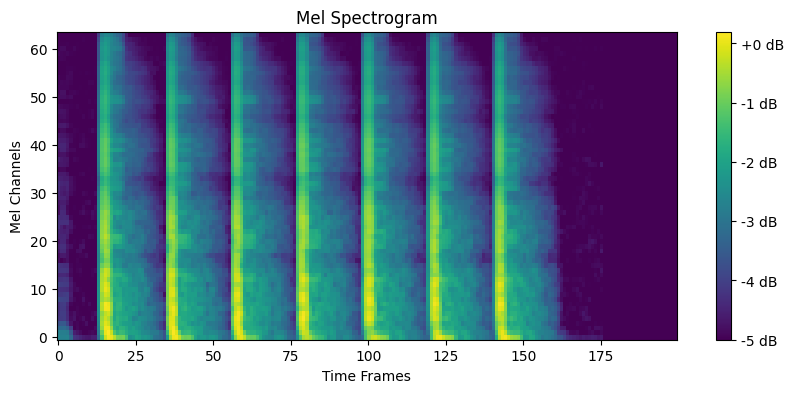

In [64]:
import matplotlib.pyplot as plt

# Load a sample mel spectrogram
sample_mel_file = os.path.join(AUDIO_MEL_SPECTROGRAMS_PATH, mel_spectrogram_files[0])
mel_spectrogram = np.load(sample_mel_file)

# Plot the mel spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram, aspect='auto', origin='lower', interpolation='none')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.ylabel("Mel Channels")
plt.xlabel("Time Frames")
plt.show()


In [65]:
import os
import numpy as np

# List all mel spectrogram files (excluding mean and std files)
mel_spectrogram_files = [
    f for f in os.listdir(AUDIO_MEL_SPECTROGRAMS_PATH) 
    if f.endswith('.npy') and f not in ['mean.npy', 'std.npy']
]

# Check the shape of mel spectrograms
for mel_file in mel_spectrogram_files:
    mel_path = os.path.join(AUDIO_MEL_SPECTROGRAMS_PATH, mel_file)
    mel_spectrogram = np.load(mel_path)
    
    if mel_spectrogram.shape != (64, 200):  # Replace with your expected shape
        print(f"Unexpected shape in {mel_file}: {mel_spectrogram.shape}")

print("Shape validation complete.")



Shape validation complete.


- Handle the inconsistency in spectrogram length by padding shorter spectrograms to match the expected shape.
- Ensure the computed mean.npy and std.npy statistics are correct.
- Ensure spectrogram normalization is properly handled.

Unexpected shape in mean.npy: (64,)
Unexpected shape in std.npy: (64,)
Mean after normalization: -2.499146649874644
Standard deviation after normalization: 1.5430739804571891


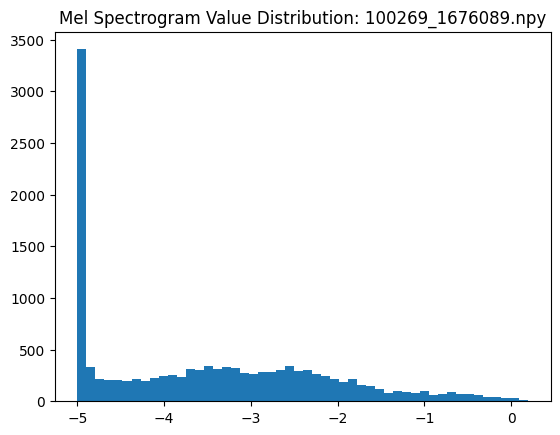

Individual Mean: -3.498781681060791, Individual Std: 1.3378243446350098
Mean.npy and Std.npy shapes are correct: Mean (64,), Std (64,)


In [66]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Set paths
AUDIO_MEL_SPECTROGRAMS_PATH = "D:/LV-NTF+LoopGAN/data/FSL10K-mel_spec"

# List of all mel spectrogram files
mel_spectrogram_files = [f for f in os.listdir(AUDIO_MEL_SPECTROGRAMS_PATH) if f.endswith('.npy')]

# Variables for tracking global stats
mel_sum = 0
mel_sq_sum = 0
num_samples = 0

# Verify the shapes of each Mel spectrogram and compute global mean and std
for mel_file in mel_spectrogram_files:
    mel_path = os.path.join(AUDIO_MEL_SPECTROGRAMS_PATH, mel_file)
    mel_spectrogram = np.load(mel_path)
    
    # Verify shape of Mel spectrogram
    if mel_spectrogram.shape != (64, 200):
        print(f"Unexpected shape in {mel_file}: {mel_spectrogram.shape}")
    
    # Update the global statistics for mean and std calculation
    mel_sum += mel_spectrogram.sum()
    mel_sq_sum += (mel_spectrogram ** 2).sum()
    num_samples += mel_spectrogram.size

# Compute mean and variance across the dataset
mean_after_normalization = mel_sum / num_samples
variance_after_normalization = (mel_sq_sum / num_samples) - (mean_after_normalization ** 2)
std_after_normalization = np.sqrt(variance_after_normalization)

print(f"Mean after normalization: {mean_after_normalization}")
print(f"Standard deviation after normalization: {std_after_normalization}")

# 1. Inspect the distribution of a sample Mel spectrogram (for visualization)
mel_spectrogram_sample = np.load(os.path.join(AUDIO_MEL_SPECTROGRAMS_PATH, mel_spectrogram_files[0]))
plt.hist(mel_spectrogram_sample.flatten(), bins=50)
plt.title(f"Mel Spectrogram Value Distribution: {mel_spectrogram_files[0]}")
plt.show()

# 2. Verify mean and std of an individual Mel spectrogram
mel_spectrogram_sample = np.load(os.path.join(AUDIO_MEL_SPECTROGRAMS_PATH, mel_spectrogram_files[0]))
mean_individual = mel_spectrogram_sample.mean()
std_individual = mel_spectrogram_sample.std()

print(f"Individual Mean: {mean_individual}, Individual Std: {std_individual}")

# 3. Additional check for mean.npy and std.npy if they exist
mean_npy_path = os.path.join(AUDIO_MEL_SPECTROGRAMS_PATH, 'mean.npy')
std_npy_path = os.path.join(AUDIO_MEL_SPECTROGRAMS_PATH, 'std.npy')

if os.path.exists(mean_npy_path) and os.path.exists(std_npy_path):
    mean = np.load(mean_npy_path)
    std = np.load(std_npy_path)
    
    if mean.shape == (64,) and std.shape == (64,):
        print(f"Mean.npy and Std.npy shapes are correct: Mean {mean.shape}, Std {std.shape}")
    else:
        print(f"Unexpected shape in mean.npy or std.npy: Mean {mean.shape}, Std {std.shape}")
else:
    print("mean.npy or std.npy not found.")


### Setup Variational Auto Encoder

In [70]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2_mu = nn.Linear(256, latent_dim)
        self.fc2_logvar = nn.Linear(256, latent_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        mu = self.fc2_mu(x)
        logvar = self.fc2_logvar(x)
        return mu, logvar


class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, 256)
        self.fc2 = nn.Linear(256, output_dim)

    def forward(self, z):
        z = F.relu(self.fc1(z))
        return torch.sigmoid(self.fc2(z))


class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, latent_dim)
        self.decoder = Decoder(latent_dim, input_dim)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar
